# **CAPSTONE PROJECT MODULE 3**

dataset: [Bike Sharing](https://drive.google.com/drive/folders/17Mw_4wSRiBB5vLLQJN137AlAbyB3CLFx)


### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. EDA
5. Featured Enginering
6. Modeling
7. Conclusion & Recommendation

# **1. Businness Problem Understanding**

### 1.1 Context
[Capital Bikeshare](https://capitalbikeshare.com/) merupakan layanan *bike-sharing* publik yang dioperasikan oleh Lyft melalui kemitraan dengan pemerintah daerah di Washington D.C., Arlington, dan Maryland. Tujuan dan manfaat dari adanya layanan ini yaitu untuk mengurangi kemacetan lalu lintas, mendorong transportasi ramah lingkungan, serta layanan ini telah terintegrasi dengan sistem transportasi umum (seperti Metro DC).

Seluruh proses penyewaan sepeda mulai dari keanggotaan, penyewaan, dan pengembalian kembali, sudah menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu stasiun Bike Sharing dan kembali lagi pada posisi atau Stasiun lain dari Capital Bike Sharing. 

### 1.2 Problem Statement
Ekspansi stasiun Capital Bikeshare ke kota-kota baru di luar Washington DC merupakan rumusan masalah/tantangan utama dalam capstone ini, dimana diperlukan prediksi yang akurat untuk memperkirakan potensi jumlah pengguna sepeda di lokasi target. 

### 1.3 Tujuan
Tujuan membangun model *machine learning* untuk memprediksi total penyewa sepeda harian, guna mendukung:
- Pengambilan keputusan ekspansi yang berbasis data.
- Penghematan anggaran melalui alokasi sumber daya yang tepat.

### 1.4 Matriks Evaluation
- MAPE
- RMSE
- R squared

### 1.5 Stakeholder

1. Team Operational bagian pengadaan dan maintanance sepeda (Team Lyft)
2. Pemda Daerah Target (kota-kota di luar Washington D.C.)

# **2. Data Understanding**

In [144]:
# Import library yang dibutuhkan untuk eksplorasi dataset
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [145]:
# Load dataset
df = pd.read_csv('data_bike_sharing.csv')

# Menampilkan 5 baris pertama pada dataframe
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


**Jumlah Kolom:** 11 kolom, **Jumlah baris:** 1265 baris, dan **tidak terdapat missing value**

**Penjelasan setiap kolom/atribut**
| Columns    | Data Type, Length | Description|
|-----| -----| -----|
| dteday     | object | date   |
| hum        | float | normalized humidity. The values are divided into 100 (max) |
| weathersit | integer | weather condition (1: Clear, Few clouds, Partly cloudy, Partly cloudy, 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) |
| holiday    | integer | holiday or not |
| season     | integer | season (1: winter, 2: spring, 3: summer, 4: fall) |
| atemp      | float | normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale) |
| temp       | float | normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale) |
| hr         | integer | hour (0 to 23) |
| casual     | integer | count of casual users |
| registered | integer | count of registered users |
| cnt        | integer | count of total rental bikes including both casual and registered |

note: kolom date haru sdiubah tipe datanya ke format date yang benar

# **3. Data Preprocessing**

**3.1 merubah tipe data kolom dtdate**

In [147]:
# merubah tipe data kolom dtday
df['dteday'] = pd.to_datetime(df['dteday'])

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12165 non-null  datetime64[ns]
 1   hum         12165 non-null  float64       
 2   weathersit  12165 non-null  int64         
 3   holiday     12165 non-null  int64         
 4   season      12165 non-null  int64         
 5   atemp       12165 non-null  float64       
 6   temp        12165 non-null  float64       
 7   hr          12165 non-null  int64         
 8   casual      12165 non-null  int64         
 9   registered  12165 non-null  int64         
 10  cnt         12165 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 1.0 MB


tipe kolom dteday sudah benar

**3.2 mengecek apakah terdapat duplikasi data**

In [149]:
df.duplicated().sum()

0

tidak terdapat data duplikat pada dataset

**3.3 Mengecek apakah terdapat duplikasi data TANPA kolom dteday**

In [150]:
semua_kolom = df.columns.tolist()

# copy daftar kolom dan hapus kolom 'dteday'
subset_columns = semua_kolom.copy()
subset_columns.remove('dteday')

# cari data duplikat tanpa kolom dteday
daftar_duplikat = df[df.duplicated(subset=subset_columns, keep=False)]
daftar_duplikat


,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
545,2012-10-26,0.88,2,0,4,0.5000,0.52,4,1,4,5
971,2012-07-26,0.74,1,0,3,0.6212,0.66,4,0,4,4
1221,2012-10-25,0.88,2,0,4,0.5000,0.52,4,1,4,5
1776,2011-12-03,0.65,1,0,4,0.2576,0.24,6,1,10,11
1924,2011-03-08,0.64,1,0,1,0.2727,0.22,4,0,2,2
2598,2012-07-30,0.83,1,0,3,0.6061,0.66,4,0,5,5
3082,2012-02-21,0.64,1,0,1,0.2727,0.22,4,0,2,2
3564,2012-03-07,0.56,1,0,1,0.2879,0.30,2,0,4,4
3935,2012-07-16,0.79,1,0,3,0.6364,0.68,3,2,4,6
5050,2012-02-29,0.56,1,0,1,0.2879,0.30,2,0,4,4


Jumlah data duplikat (dengan mengecualikan kolom dteday) **sebanyak 11 data**. Seperti pada baris 1 dan 3 di atas, selain kolom dteday, kolom lainnya memiliki **informasi yang sama** sehingga data diasumsikan sebagai data duplikat dan **data dihapus** agar tetap menjaga keberagaman data dan representasi nyata, dan menghindari bias dan overfitting dalam model machine learning.

In [151]:
# hapus data duplikat
df.drop_duplicates(subset=subset_columns, keep='first', inplace=True)

**3.4 Cek Outliers**

                              dteday           hum    weathersit  \
count                          12154  12154.000000  12154.000000   
mean   2012-01-01 02:19:48.349514496      0.625351      1.417229   
min              2011-01-01 00:00:00      0.000000      1.000000   
25%              2011-07-02 00:00:00      0.470000      1.000000   
50%              2012-01-02 00:00:00      0.620000      1.000000   
75%              2012-07-03 00:00:00      0.780000      2.000000   
max              2012-12-31 00:00:00      1.000000      4.000000   
std                              NaN      0.192138      0.636090   

            holiday        season         atemp         temp            hr  \
count  12154.000000  12154.000000  12154.000000  12154.00000  12154.000000   
mean       0.029784      2.488481      0.476997      0.49819     11.526987   
min        0.000000      1.000000      0.000000      0.02000      0.000000   
25%        0.000000      2.000000      0.333300      0.34000      6.000000 

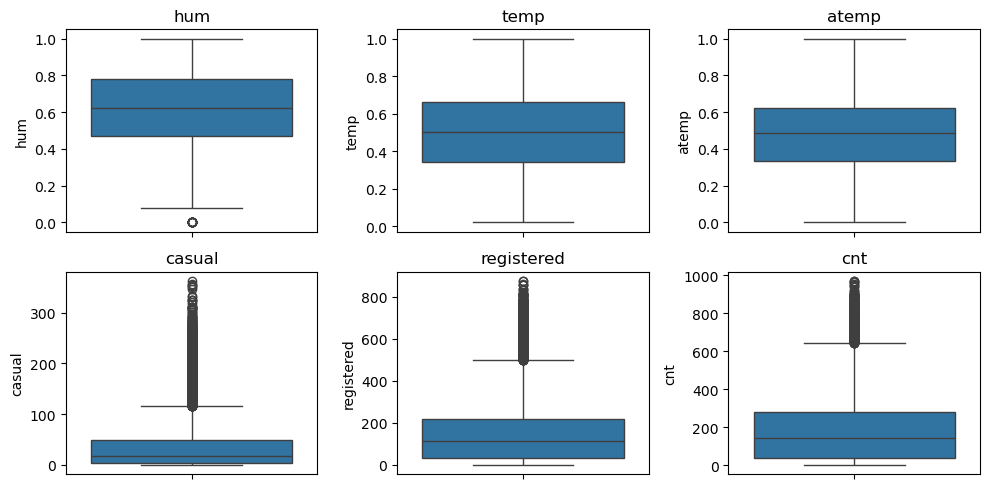

In [152]:
# Statistik Deskriptif
print(df.describe())

# Visualisasi Boxplot untuk Kolom Numerik
numeric_cols = ['hum', 'temp', 'atemp', 'casual', 'registered', 'cnt']
plt.figure(figsize=(10, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### insigths:
- Terdapat outlier pada kolom Humidity (nilai sangat rendah, mendekati 0), dimana tingkat kelembapan '0' sangat jarang terjadi di bumi
- Kolom temp dan atemp tidak ada outliers
- Kolom casual dan registered memiliki banyak outliers, 
- Kolom Target (cnt) memiliki distribusi yang tidak normal dan berbentuk right skewed

**cek anomali kolom weathersit**

In [153]:
# cek value count kolom weathersit
df['weathersit'].value_counts()

weathersit
1    8061
2    3118
3     972
4       3
Name: count, dtype: int64

In [154]:
# cek baris wheatersit 4
df[df['weathersit']== 4]

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
3208,2011-01-26,0.93,4,0,1,0.1970,0.22,16,1,35,36
11386,2012-01-09,0.86,4,0,1,0.2273,0.20,18,6,158,164
12079,2012-01-21,0.86,4,0,1,0.1364,0.14,1,1,22,23


Berdasarkan cuaca (4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog), sepertinya tidak mungkin untuk menggunakan sepeda di cuaca sepperti tu, dan jumlah data hanya 3 juga sehingga akan saya asumsikan sebagai data duplikat dan akan dihapus

In [155]:
# hapus wheatersit 4
df.drop([3208, 11386, 12079],axis=0,inplace=True)

**cek anomali kolom humidity**
- pada grafik di atas, ada humidity bernilai 0 yang mana sangat jarang terjadi di bumi, maka saya akan mengisinya dengan **median hum berdasarkan kombinasi weathersit dan season**, karena kedua kolom ini mempengaruhi kelembapan

In [156]:
df[df['hum']==0]

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
345,2011-03-10,0.0,3,0,1,0.3939,0.38,7,1,36,37
871,2011-03-10,0.0,3,0,1,0.4394,0.44,15,3,11,14
1645,2011-03-10,0.0,3,0,1,0.3182,0.34,0,3,0,3
3239,2011-03-10,0.0,2,0,1,0.4394,0.44,17,2,109,111
3717,2011-03-10,0.0,2,0,1,0.3333,0.34,22,4,30,34
4924,2011-03-10,0.0,3,0,1,0.3333,0.36,6,0,12,12
7285,2011-03-10,0.0,3,0,1,0.3182,0.34,1,0,2,2
7760,2011-03-10,0.0,3,0,1,0.4242,0.42,12,4,30,34
8412,2011-03-10,0.0,3,0,1,0.3939,0.38,8,1,43,44
8960,2011-03-10,0.0,3,0,1,0.3485,0.34,23,1,26,27


In [157]:
median = df.groupby(['weathersit','season'])['hum'].median()
median

weathersit  season
1           1         0.500
            2         0.570
            3         0.600
            4         0.610
2           1         0.650
            2         0.755
            3         0.730
            4         0.710
3           1         0.870
            2         0.870
            3         0.840
            4         0.880
Name: hum, dtype: float64

In [165]:
# isi kolom dengan median
df['hum'] = df['hum'].replace(0, float('nan'))
df['hum'] = df.groupby(['season', 'weathersit'])['hum'].transform(lambda x: x.fillna(x.median()))

In [166]:
df.loc[[345,   871,  1645,  3239,  3717,  4924,  7285,  7760,  8412,  8960,9186,  9651, 10715, 11766]]

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,date,month,year,day_name,day_type
345,2011-03-10,0.87,3,0,1,0.3939,0.38,7,1,36,37,10,3,2011,Thursday,1
871,2011-03-10,0.87,3,0,1,0.4394,0.44,15,3,11,14,10,3,2011,Thursday,1
1645,2011-03-10,0.87,3,0,1,0.3182,0.34,0,3,0,3,10,3,2011,Thursday,1
3239,2011-03-10,0.65,2,0,1,0.4394,0.44,17,2,109,111,10,3,2011,Thursday,1
3717,2011-03-10,0.65,2,0,1,0.3333,0.34,22,4,30,34,10,3,2011,Thursday,1
4924,2011-03-10,0.87,3,0,1,0.3333,0.36,6,0,12,12,10,3,2011,Thursday,1
7285,2011-03-10,0.87,3,0,1,0.3182,0.34,1,0,2,2,10,3,2011,Thursday,1
7760,2011-03-10,0.87,3,0,1,0.4242,0.42,12,4,30,34,10,3,2011,Thursday,1
8412,2011-03-10,0.87,3,0,1,0.3939,0.38,8,1,43,44,10,3,2011,Thursday,1
8960,2011-03-10,0.87,3,0,1,0.3485,0.34,23,1,26,27,10,3,2011,Thursday,1


**3.5 Penambahan Kolom**

In [167]:
df['date'] = df['dteday'].dt.day # kolom tanggal
df['month'] = df['dteday'].dt.month # kolom bulan
df['year'] = df['dteday'].dt.year # kolom tahun
df['day_name'] = df['dteday'].dt.strftime('%A') # kolom  nama hari

In [168]:
# membuat kolom untuk menandai weekday/weekend
df['day_type'] = df['day_name'].apply(lambda x: 1 if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 0)

# **4. EDA**

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12151 entries, 0 to 12164
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12151 non-null  datetime64[ns]
 1   hum         12151 non-null  float64       
 2   weathersit  12151 non-null  int64         
 3   holiday     12151 non-null  int64         
 4   season      12151 non-null  int64         
 5   atemp       12151 non-null  float64       
 6   temp        12151 non-null  float64       
 7   hr          12151 non-null  int64         
 8   casual      12151 non-null  int64         
 9   registered  12151 non-null  int64         
 10  cnt         12151 non-null  int64         
 11  date        12151 non-null  int32         
 12  month       12151 non-null  int32         
 13  year        12151 non-null  int32         
 14  day_name    12151 non-null  object        
 15  day_type    12151 non-null  int64         
dtypes: datetime64[ns](1), float

In [170]:
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,date,month,year,day_name,day_type
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,9,12,2011,Friday,1
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,17,6,2012,Sunday,0
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,15,6,2011,Wednesday,1
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,31,3,2012,Saturday,0
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,31,7,2012,Tuesday,1


### **Insights:**
jumlah baris setelah data cleaning 12164, jumlah kolom 16 kolom
- sebelumnya 12265

# - **Total Sewa Sepeda per Tahun**

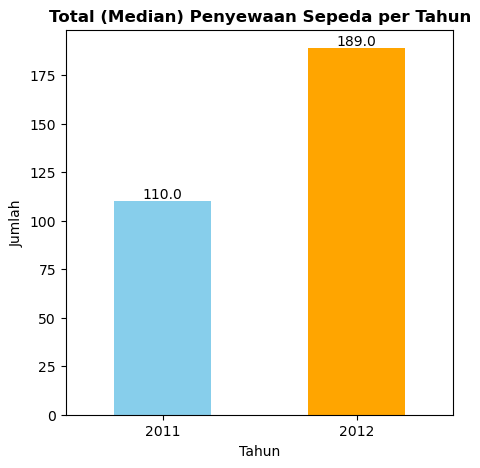

In [83]:
plt.figure(figsize=(5, 5))
yearly_cnt = df.groupby('year')['cnt'].median()
ax = yearly_cnt.plot(kind='bar', color=['skyblue', 'orange'])
for i, v in enumerate(yearly_cnt):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10)
plt.xlabel('Tahun')
plt.xticks(rotation=0)
plt.ylabel('Jumlah')
plt.title('Total (Median) Penyewaan Sepeda per Tahun', weight='bold')
plt.show()

Adanya kenaikan jumlah penyewaan sepeda

# - **Total Sewa Sepeda per Bulan**

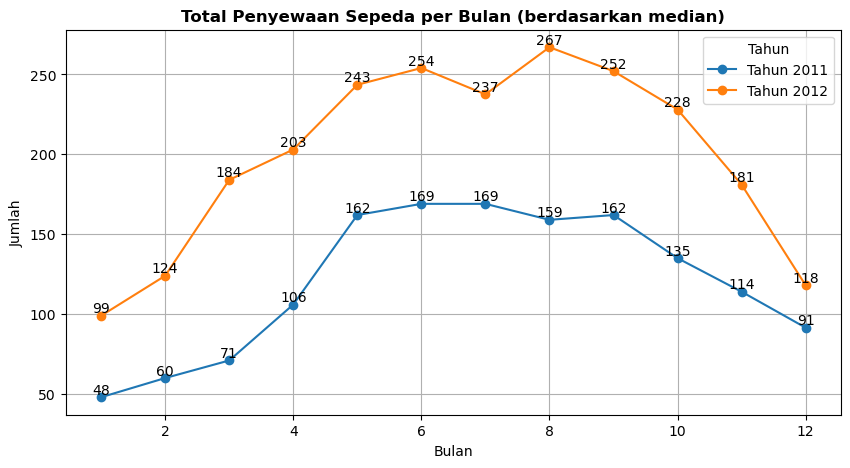

In [84]:
median_cnt_month = df.groupby(['year', 'month'])['cnt'].median().unstack()

# Plot
plt.figure(figsize=(10, 5))
for year in median_cnt_month.index:
    plt.plot(median_cnt_month.columns, median_cnt_month.loc[year], marker='o', linestyle='-', label=f'Tahun {year}')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.title('Total Penyewaan Sepeda per Bulan (berdasarkan median)', weight='bold')


for year in median_cnt_month.index:
    for i, median in enumerate(median_cnt_month.loc[year]):
        plt.text(median_cnt_month.columns[i], median, str(int(median)), ha='center', va='bottom')

plt.grid(True)
plt.legend(title='Tahun')
plt.show()

Jumlah penyewaan terbanyak di bulan Mei hingga September di tiap tahun

# - **Total Sewa Sepeda berdasarkan Jam**

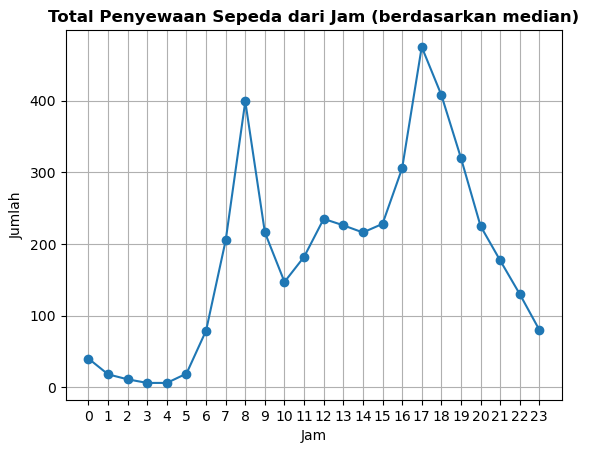

In [85]:
median_cnt_hour = df.groupby('hr')['cnt'].median()

plt.plot(median_cnt_hour.index, median_cnt_hour.values, marker='o', linestyle='-')
plt.xlabel('Jam')
plt.ylabel('Jumlah')
plt.title('Total Penyewaan Sepeda dari Jam (berdasarkan median)', weight='bold')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

Puncak penyewaan sepeda berada pada jam 8 pagi dan jam 17.00 sore hari

# - **Total Sewa Sepeda berdasarkan Hari**

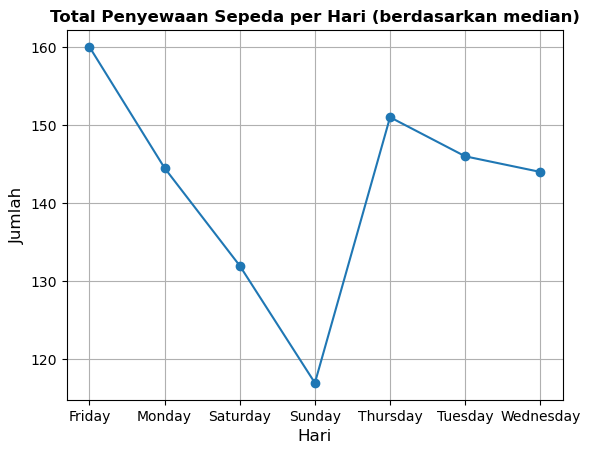

In [87]:
median_cnt_day = df.groupby('day_name')['cnt'].median()

plt.plot(median_cnt_day.index, median_cnt_day.values, marker='o', linestyle='-')
plt.xlabel('Hari', fontsize= 12)
plt.ylabel('Jumlah', fontsize= 12)
plt.title('Total Penyewaan Sepeda per Hari (berdasarkan median)', weight='bold')
plt.grid(True)
plt.show()

Jumlah sewa sepeda terbanyak pada hari jumat dan jumlah sewa terendah ada di hari minggu

# - **Total Sewa Sepeda berdasarkan Tanggal**

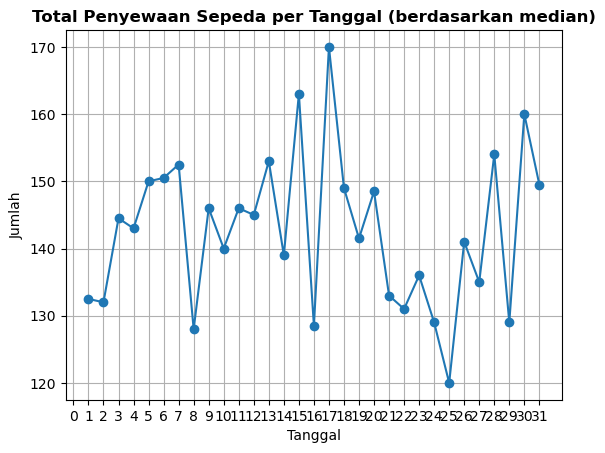

In [88]:
median_cnt_date = df.groupby('date')['cnt'].median()

plt.plot(median_cnt_date.index, median_cnt_date.values, marker='o', linestyle='-')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah')
plt.title('Total Penyewaan Sepeda per Tanggal (berdasarkan median)', weight='bold')
plt.xticks(range(0, 32))
plt.grid(True)
plt.show()

# - **Total Sewa Sepeda pada Hari Libur**

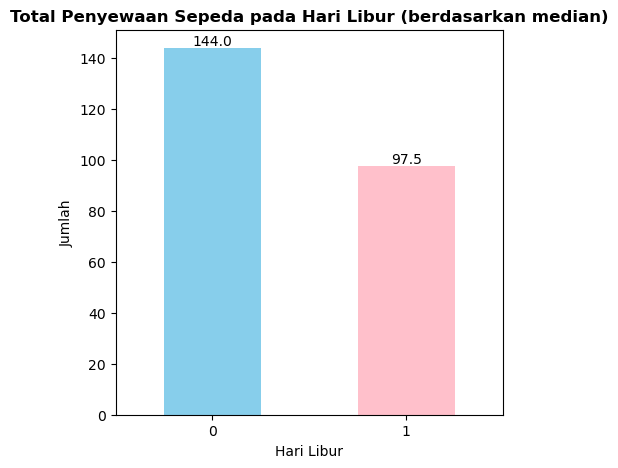

In [89]:
plt.figure(figsize=(5, 5))
holiday_cnt = df.groupby('holiday')['cnt'].median()
ax = holiday_cnt.plot(kind='bar', color=['skyblue', 'pink'])
for i, v in enumerate(holiday_cnt):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10)
plt.xlabel('Hari Libur')
plt.xticks(rotation=0)
plt.ylabel('Jumlah')
plt.title('Total Penyewaan Sepeda pada Hari Libur (berdasarkan median)', weight='bold')
plt.show()

Penyewaan terbanyak bukan pada hari libur

# - **Total Sewa Sepeda berdasarkan Weekday**

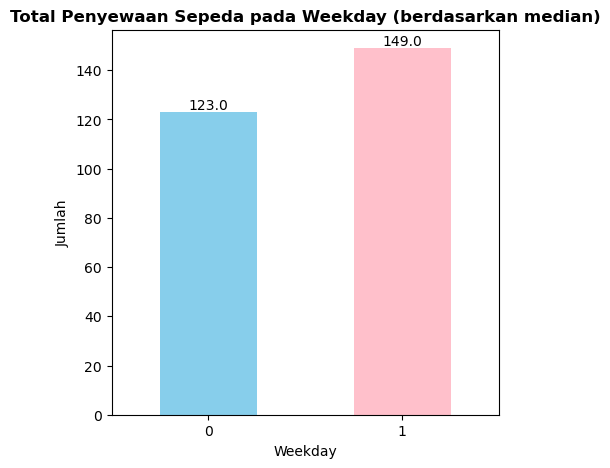

In [90]:
plt.figure(figsize=(5, 5))
holiday_cnt = df.groupby('day_type')['cnt'].median()
ax = holiday_cnt.plot(kind='bar', color=['skyblue', 'pink'])
for i, v in enumerate(holiday_cnt):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10)
plt.xlabel('Weekday')
plt.xticks(rotation=0)
plt.ylabel('Jumlah')
plt.title('Total Penyewaan Sepeda pada Weekday (berdasarkan median)', weight='bold')
plt.show()

Penyewaan sepeda terbanyak pada hari kerja (weekday)

# - **Korelasi**

dari box plot di bagian sebelumnya, kolom cnt mempunyai distribusi right skewed

<function matplotlib.pyplot.show(close=None, block=None)>

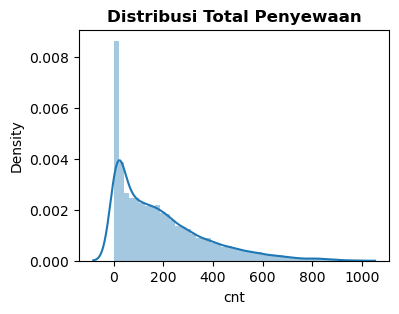

In [91]:
plt.figure(figsize=(4,3))
sns.distplot(df['cnt'])
plt.title('Distribusi Total Penyewaan', weight='bold')
plt.show

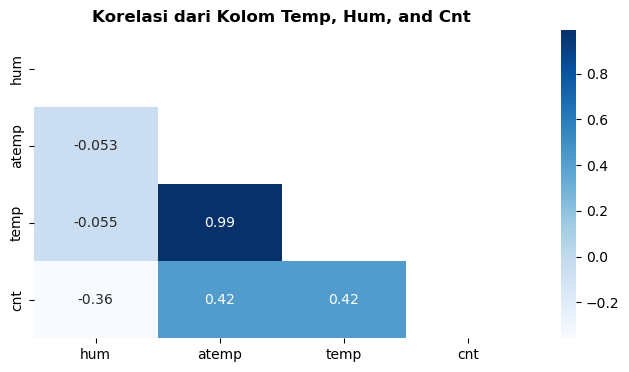

In [92]:
# heatmap korelasi kolom numerik
df_numeric = df[['hum','atemp','temp','cnt']]
corr_spearman = df_numeric.corr(method='spearman')
mask = np.triu(np.ones_like(corr_spearman, dtype=bool))

# Membuat Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_spearman, cmap='Blues', annot=True, mask=mask)
plt.title('Korelasi dari Kolom Temp, Hum, and Cnt', weight='bold')
plt.show()

**Insights:**
- Faktor suhu lebih mempengaruhi jumlah penyewaan sepeda dibanding kelembapan.
- Heatmap menunjukkan preferensi pengguna untuk bersepeda di cuaca hangat dan kering.
- Korelasi antara hum dengan temp/atemp rendah (-0,05), menujukkan lembap atau tidaknya udara tidak banyak berkaitan dengan suhu pada dataset ini.
- Kolom temp dan atemp memiliki korelasi tinggi (0.99), artinya hampir identik — hal ini karena atemp adalah persepsi suhu yang diturunkan dari temp. Salah satu bisa di-drop untuk menghindari multikolinearitas.

# **5. Featured Enginering**

In [93]:
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,date,month,year,day_name,day_type
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,9,12,2011,Friday,1
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,17,6,2012,Sunday,0
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,15,6,2011,Wednesday,1
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,31,3,2012,Saturday,0
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,31,7,2012,Tuesday,1


In [94]:
# mapping kolom day name
day_name_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}
df['day_name'] = df['day_name'].map(day_name_mapping)

# Kolom yang akan di-ordinal encoding
ordinal_cols = ['day_name']

# Transformer untuk ordinal encoding
ordinal_encoder = ce.OrdinalEncoder(cols=ordinal_cols)

In [95]:
df.columns

Index(['dteday', 'hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp',
       'hr', 'casual', 'registered', 'cnt', 'date', 'month', 'year',
       'day_name', 'day_type'],
      dtype='object')

# **6. Modeling**

# **Skema**

In [96]:
transformer = ColumnTransformer([
    ('OHE', OneHotEncoder(drop='first'), ['weathersit', 'season']),
    ('OE', ordinal_encoder, ordinal_cols)
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE', OneHotEncoder(drop='first'),
                                 ['weathersit', 'season']),
                                ('OE', OrdinalEncoder(cols=['day_name']),
                                 ['day_name'])])

Skma Transformer :
1. Kolom weathersit dan season menggunakan One Hot Encoding karena nilai kategori pada data tidak banyak
2. Kolom Day menggunakan Ordinal Encoding karenakan nama hari merupakan kolom kategorikal dengan tingkatan dari hari senin hingga minggu

## - **Train Splitting**

In [97]:
X = df.drop(['dteday','atemp','cnt','registered','casual'],axis = 1)
y = df['cnt']

xtrain, xtest, ytrain, ytest = train_test_split(X,
                                                y,
                                                random_state = 168,
                                                test_size = 0.2)

- Proporsi data test nya adalah 20 % dan data trainnya adalah 80%
- **Kolom cnt sebagai kolom target** karena akan **memprediksi jumlah total penyewa sepeda**

## - **Model Benchmarking**

In [98]:
# Model yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=5)
dt = DecisionTreeRegressor(random_state=168)
rf = RandomForestRegressor(random_state=168)
xgb = XGBRegressor(random_state=168)

models = [lr, knn, dt, rf, xgb]
model_names = ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor']

# Inisialisasi list hasil
mean_rmse, std_rmse = [], []
mean_r2, std_r2 = [], []
mean_mape, std_mape = [], []

# Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=168)

# Evaluasi setiap model
for model in models:
    pipe = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])
    
    # RMSE
    scores_rmse = cross_val_score(pipe, xtrain, ytrain, cv=cv, scoring='neg_root_mean_squared_error')
    mean_rmse.append(-scores_rmse.mean())
    std_rmse.append(scores_rmse.std())

    # R-squared
    scores_r2 = cross_val_score(pipe, xtrain, ytrain, cv=cv, scoring='r2')
    mean_r2.append(scores_r2.mean())
    std_r2.append(scores_r2.std())

    # MAPE
    scores_mape = cross_val_score(pipe, xtrain, ytrain, cv=cv, scoring='neg_mean_absolute_percentage_error')
    mean_mape.append(-scores_mape.mean())
    std_mape.append(scores_mape.std())

# Buat DataFrame hasil akhir
df_eval_no_log = pd.DataFrame({
    'Model': model_names,
    'Mean_RMSE': mean_rmse,
    'Std_RMSE': std_rmse,
    'Mean_R_Squared': mean_r2,
    'Std_R_Squared': std_r2,
    'Mean_MAPE': mean_mape,
    'Std_MAPE': std_mape
}).sort_values(by='Mean_MAPE', ascending=False)

print(df_eval_no_log)

                    Model   Mean_RMSE  Std_RMSE  Mean_R_Squared  \
0       Linear Regression  140.266050  2.354600        0.390675   
1           KNN Regressor   93.653639  4.624385        0.728280   
4       XGBoost Regressor   42.086606  1.846618        0.945109   
2  DecisionTree Regressor   64.790079  1.030950        0.869879   
3  RandomForest Regressor   47.281456  1.939353        0.930689   

   Std_R_Squared  Mean_MAPE  Std_MAPE  
0       0.010123   3.298436  0.237174  
1       0.019657   0.806453  0.057104  
4       0.003876   0.448385  0.034492  
2       0.005758   0.417156  0.016400  
3       0.005037   0.360094  0.030581  


## -**MODEL BENCHMARKING (SETELAH SKALA LOGARITMIK)**

In [100]:
# Model yang digunakan
LR = LinearRegression()
KNN = KNeighborsRegressor(n_neighbors=5)
DTR = DecisionTreeRegressor(random_state=168)
RF = RandomForestRegressor(random_state=168)
XGB = XGBRegressor(random_state=168)

# Bungkus dengan log-transform
models = [
    TransformedTargetRegressor(LR, func=np.log1p, inverse_func=np.expm1),
    TransformedTargetRegressor(KNN, func=np.log1p, inverse_func=np.expm1),
    TransformedTargetRegressor(DTR, func=np.log1p, inverse_func=np.expm1),
    TransformedTargetRegressor(RF, func=np.log1p, inverse_func=np.expm1),
    TransformedTargetRegressor(XGB, func=np.log1p, inverse_func=np.expm1)
]

model_names = ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']

# Cross-validation
results = []
cv = KFold(n_splits=5, shuffle=True, random_state=168)

for model, name in zip(models, model_names):
    pipeline = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])

    cv_rmse = cross_val_score(pipeline, xtrain, ytrain, cv=cv, scoring='neg_root_mean_squared_error')
    cv_r2 = cross_val_score(pipeline, xtrain, ytrain, cv=cv, scoring='r2')
    cv_mape = cross_val_score(pipeline, xtrain, ytrain, cv=cv, scoring='neg_mean_absolute_percentage_error')

    results.append({
        'Model': name,
        'Mean RMSE': -cv_rmse.mean(),
        'Std RMSE': cv_rmse.std(),
        'Mean R2': cv_r2.mean(),
        'Std R2': cv_r2.std(),
        'Mean MAPE': -cv_mape.mean(),
        'Std MAPE': cv_mape.std()
    })

# Hasil akhir ke DataFrame
df_final_fixed = pd.DataFrame(results).sort_values(by='Mean MAPE', ascending=True)
print(df_final_fixed)


               Model   Mean RMSE  Std RMSE   Mean R2    Std R2  Mean MAPE  \
4            XGBoost   42.964716  2.259964  0.942704  0.005666   0.249561   
3      Random Forest   47.458770  1.836627  0.930168  0.004897   0.288282   
2      Decision Tree   63.370649  2.621766  0.875469  0.009436   0.402766   
1                KNN   96.038997  4.618235  0.714229  0.020608   0.558809   
0  Linear Regression  158.826640  3.197636  0.218745  0.018091   1.427723   

   Std MAPE  
4  0.012034  
3  0.012150  
2  0.032671  
1  0.034570  
0  0.067072  


### **Ringkasan**

| Model                 | RMSE Sebelum | RMSE Sesudah | R² Sebelum | R² Sesudah | MAPE Sebelum | MAPE Sesudah |
| --------------------- | ------------ | ------------ | ---------- | ---------- | ------------ | ------------ |
| **Linear Regression** | 140.27       | 158.83       | 0.391      | 0.219      | 3.298        | 1.428        |
| **KNN Regressor**     | 93.65        | 96.04        | 0.728      | 0.714      | 0.806        | 0.559        |
| **Decision Tree**     | 64.79        | 63.37        | 0.870      | 0.875      | 0.417        | 0.403        |
| **Random Forest**     | 47.28        | 47.46        | 0.931      | 0.930      | 0.360        | 0.288        |
| **XGBoost**           | 42.09        | 42.96        | 0.945      | 0.943      | 0.448        | 0.250        |


### **Insights:**
- XGBoost dan Random Forest adalah model terbaik sebelum dan sesudah transformasi (berdasarkan MAPE)
- Model R² tetap tinggi untuk model kompleks seperti RF dan XGB, artinya log-transform tidak mengurangi akurasi kedua model
- Linear Regression turun performa drastis setelah log-transform (baik RMSE, R², maupun MAPE), menandakan model ini tidak cocok untuk target dalam skala log pada data ini.
- Model Decision Tree dan KNN punya perubahan kecil, tetapi MAPE tetap menurun.

In [104]:
# Predict test XGBoost dan Random Forest
models = {
    'XGBoost': log_xgb,  # Model XGBoost setelah log transform
    'RandomForest': log_rf  # Model RandomForest setelah log transform
}

score_rmse = []  # List untuk menyimpan RMSE
score_mape = []  # List untuk menyimpan MAPE
score_r2 = []  # List untuk menyimpan R-squared

# Loop untuk menghitung skor untuk masing-masing model
for model_name in models:
    # Membuat pipeline yang terdiri dari transformer dan model
    model = Pipeline([
        ('preprocessing', transformer), 
        ('model', models[model_name])
])

    model.fit(xtrain, ytrain)
    
    # Melakukan prediksi pada data test
    y_pred = model.predict(xtest)
    
    # Menghitung RMSE, MAPE, dan R-squared untuk model ini
    rmse = np.sqrt(mean_squared_error(ytest, y_pred))  # RMSE
    mape = mean_absolute_percentage_error(ytest, y_pred)  # MAPE
    r2 = r2_score(ytest, y_pred)  # R-squared
    
    # Menambahkan hasil per model ke dalam list
    score_rmse.append(rmse)
    score_mape.append(mape)
    score_r2.append(r2)

# Membuat DataFrame untuk hasil evaluasi
score_before_tuning = pd.DataFrame({
    'RMSE': score_rmse,    
    'MAPE': score_mape,      
    'R Squared': score_r2      
}, index=models.keys())  

# Menampilkan hasil evaluasi
print(score_before_tuning)

                   RMSE     MAPE  R Squared
XGBoost       42.834979  0.23138   0.947434
RandomForest  47.063449  0.26739   0.936543


### **Insights:**
XGBoost menunjukkan hasil terbaik pada RMSE (42.83), MAPE (0.231), dan R² (0.947) di test set. Ini menunjukkan bahwa XGBoost adalah model yang paling baik secara keseluruhan dalam mengatasi prediksi test

## **Hyperparameter XGBoost**

- Berdasarkan hasil before-after logaritmik dan predict test, XGBoost menunjukkan hasil yang paling baik di antara semua model. Tidak hanya di satu metrik, tetapi di semua metrik (RMSE, MAPE, R²), XGBoost secara konsisten memberikan performa terbaik. Maka, saya **hanya akan melakukan hyperparameter tuning pada XGBoost.**

- Akan dilakukan hyperparameter tuning Gridsearch XGBoost ==> Untuk menemukan kombinasi hyperparameter yang optimal bagi model dengan **mencoba semua kemungkinan kombinasi** dari hyperparameter yang telah ditentukan sebelumnya.

### **Random Search XGBoost**

In [171]:
# Definisikan model XGBoost
xgb = XGBRegressor(random_state=168)

# Tentukan ruang pencarian untuk hyperparameter
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500], #Jumlah pohon keputusan yang akan dibangun oleh model XGBoost
    'learning_rate': [0.01, 0.1, 0.2, 0.3], #mengontrol seberapa besar perubahan yang dilakukan pada model setelah setiap iterasi
    'max_depth': [3, 5, 6, 7, 10], #mengontrol kompleksitas model. jika terlalu dalam, model mungkin mengalami overfitting
    'subsample': [0.7, 0.8, 0.9, 1.0], #ntuk meningkatkan stabilitas model dan mengurangi overfitting
    #'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    #'gamma': [0, 0.1, 0.2, 0.3]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100, cv=3, 
                                   scoring='neg_root_mean_squared_error', verbose=1, random_state=168)
random_search.fit(xtrain, ytrain)

# Hasil terbaik
print("Best parameters:", random_search.best_params_)
print("Best RMSE:", -random_search.best_score_)

# Evaluasi pada test set
y_pred = random_search.predict(xtest)
print("Test RMSE:", np.sqrt(mean_squared_error(ytest, y_pred)))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'subsample': 0.7, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.1}
Best RMSE: 39.464715321858726
Test RMSE: 40.55564241675796


### **PREDICT TEST XGB Random Search**

In [172]:
# Fit model ke data train dengan hyperparameters terbaik
best_model = random_search.best_estimator_

# Melatih model dengan data train
best_model.fit(xtrain, ytrain)

# Prediksi menggunakan data test
y_pred = best_model.predict(xtest)

# Evaluasi model
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
mape = mean_absolute_percentage_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

# hasil evaluasi
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"R²: {r2}")

RMSE: 40.55564241675796
MAPE: 0.3478034734725952
R²: 0.9528793692588806


# sebelum
                   RMSE     MAPE  R Squared
XGBoost       42.834979  0.23138   0.947434

### **Insights:**
- XGBoost menunjukkan penurunan RMSE yang lebih baik dari 42.83 menjadi 40.92 setelah tuning, yang berarti performa model meningkat setelah dilakukan tuning.
- MAPE untuk XGBoost meningkat menjadi 0.436. Ini menunjukkan bahwa meskipun tuning meningkatkan beberapa metrik (seperti RMSE), ada sedikit penurunan pada MAPE.
- R² untuk XGBoost meningkat menjadi 0.952, yang menunjukkan bahwa model lebih baik dalam menjelaskan variabilitas data setelah dilakukan tuning.

- Secara keseluruhan, hasil tuning pada XGBoost meningkatkan performa model, terutama dari segi RMSE dan R², meskipun ada sedikit penurunan di MAPE.

### **Plot Grafik**

In [173]:
# Buat DataFrame untuk observasi, prediksi, dan residual
df_results = pd.DataFrame({
    'Observasi': ytest,  # Data sebenarnya (ytest)
    'Prediksi': y_pred,  # Hasil prediksi dari model
    'Residual': ytest - y_pred  # Selisih antara observasi dan prediksi
})

# Tampilkan DataFrame
print(df_results.head())

      Observasi    Prediksi   Residual
8709         33   28.815344   4.184656
2180        463  462.341705   0.658295
6276        155  194.821869 -39.821869
2858         10   15.689095  -5.689095
1738        489  450.008484  38.991516


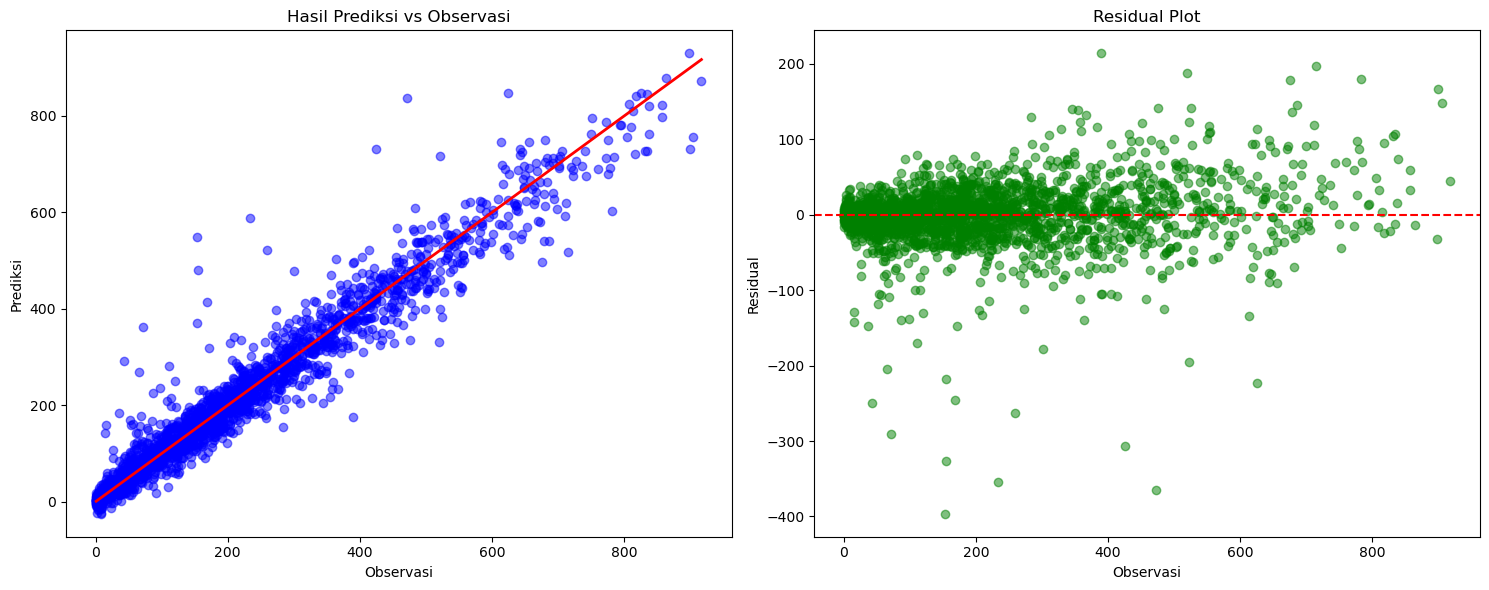

In [174]:
# Plot
plt.figure(figsize=(15, 6))

# Plot Hasil Prediksi vs Observasi di subplot pertama
plt.subplot(1, 2, 1)
plt.scatter(df_results['Observasi'], df_results['Prediksi'], color='blue', alpha=0.5)
plt.plot([df_results['Observasi'].min(), df_results['Observasi'].max()], 
         [df_results['Observasi'].min(), df_results['Observasi'].max()], color='red', lw=2)  # Garis referensi
plt.title('Hasil Prediksi vs Observasi')
plt.xlabel('Observasi')
plt.ylabel('Prediksi')

# Plot Residual Plot di subplot kedua
plt.subplot(1, 2, 2) 
plt.scatter(df_results['Observasi'], df_results['Residual'], color='green', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')  # Garis horizontal pada residual = 0
plt.title('Residual Plot')
plt.xlabel('Observasi')
plt.ylabel('Residual')

# Menampilkan kedua plot dalam satu figure
plt.tight_layout()
plt.show()


### **Insights:**
- Distribusi haisl prediksi vs observasi => menunjukkan hubungan yang sangat kuat antara nilai prediksi dan observasi. Titik data bergerak searah dengan garis regresi merah, yang menunjukkan bahwa model memiliki kemampuan yang baik dalam memprediksi output dengan akurat
- Distribusi residual => residual tersebar secara acak di sekitar garis horizontal (0), yang berarti model tidak menunjukkan tanda-tanda kesalahan sistematik, artinya model cenderung berhasil dalam menangkap pola-pola yang ada dalam data

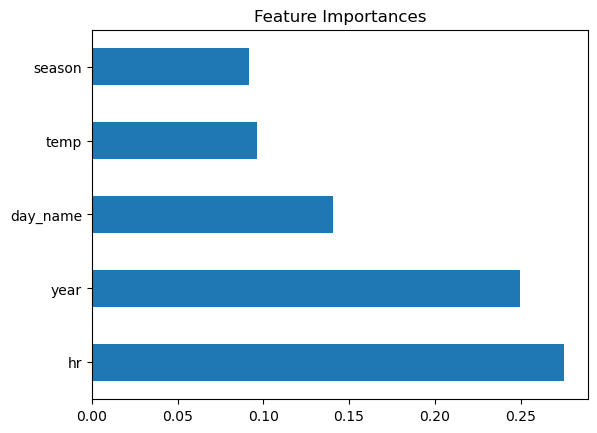

In [175]:
xgb.fit(xtrain, ytrain)
transformed_columns = xtrain.columns 

# Membuat Barplot Feature Importances
feature_imp = pd.Series(xgb.feature_importances_, index=transformed_columns).sort_values(ascending=False).head()
feature_imp.plot(kind='barh', title='Feature Importances')
plt.show()

fitur yang paling mempengaruhi model XGBoost dalam mempelajari data adalah fitur season, temp, day_name, year dan hr

# **7. Conclusion & Recommendation**

### **Conclusion:**
- Penyewaan per Tahun (Median): terlihat bahwa ada peningkatan yang signifikan dari 2011 (110) ke 2012 (189). Hal ini mengindikasikan bahwa permintaan sepeda cenderung meningkat pada tahun-tahun berikutnya, yang merupakan indikasi bahwa permintaan di masa depan **mungkin** akan terus meningkat di lokasi baru
- Penyewaan per Bulan (Median): terlihat bahwa penyewaan pada bulan-bulan tertentu lebih tinggi, dengan puncak pada bulan-bulan seperti Maret hingga Mei. Ini menunjukkan bahwa musim tertentu (terutama musim semi dan panas) sangat memengaruhi penggunaan sepeda
- Penyewaan per Jam: terlihat bahwa jam sibuk di pagi hari (sekitar jam 7-9) dan sore hari (sekitar jam 17-19) adalah puncak penggunaan sepeda. Ini menggambarkan bahwa sepeda banyak digunakan untuk aktivitas komuter, yang sangat relevan untuk kawasan perkotaan dengan banyak pekerja.
- Penyewaan pada Weekday: Penyewaan pada weekday lebih tinggi dibandingkan hari libur, mengindikasikan bahwa sepeda lebih banyak digunakan untuk aktivitas komuter.
- Model yang digunakan untuk memprediksi jumlah pengguna sepeda di lokasi target dapat memanfaatkan berbagai fitur, seperti waktu (jam dan tahun), musim, suhu, dan hari dalam seminggu. Dalam hal ini, XGBoost menunjukkan hasil terbaik dibandingkan dengan model lain, seperti Random Forest dan Decision Tree, dengan nilai RMSE yang lebih rendah dan R² yang lebih tinggi, mengindikasikan model yang lebih baik dalam memprediksi jumlah pengguna.
- fitur yang paling mempengaruhi model XGBoost dalam mempelajari data adalah fitur season, temp, day_name, year dan hr

### **Recommendation**
- **Fokus pada Musim dan Waktu:** Ekspansi sebaiknya difokuskan pada kota-kota dengan musim hangat dan cuaca mendukung aktivitas luar ruangan, serta area dengan jam sibuk seperti pusat transportasi dan perkantoran.
- **Penyusunan Infrastruktur:** Tempatkan stasiun sepeda di dekat pusat perkantoran dan destinasi rekreasi untuk mengakomodasi puncak penggunaan di jam sibuk pagi dan sore hari, serta akhir pekan.
- **Pertimbangkan Cuaca dan Temperatur:** Lokasi dengan suhu yang lebih tinggi (musim panas panjang) lebih ideal. Gunakan data suhu untuk menyesuaikan jumlah sepeda yang dibutuhkan.
- **Hari Kerja dan Libur:** Fokuskan penyewaan pada hari kerja untuk mobilitas harian, sementara juga siapkan layanan pada hari libur untuk mengakomodasi permintaan pada acara besar.
- **Gunakan Model untuk Perencanaan Ekspansi:** Manfaatkan hasil model XGBoost untuk memprediksi kebutuhan sepeda dan lokasi stasiun yang strategis di kota-kota baru.

Rekomendasi untuk Peningkatan Model:
- Kurangi MAPE: dari hasil ML MAPE meiliki nilai 43,55% sehingga masih pelu untuk melakukan hyperparameter tuning lebih lanjut atau eksplorasi model lain untuk mengurangi MAPE. Misalnya, menggunakan cross-validation atau menggabungkan model (ensemble) bisa membantu mengurangi kesalahan prediksi.
- Meningkatkan Preprocessing Data: Pertimbangkan untuk melakukan lebih banyak feature engineering (misalnya, interaksi antar fitur) atau scaling/normalization data agar model dapat menangkap pola dengan lebih baik.

#### **Save Model**

In [176]:
# # Save model
import pickle

pickle.dump(best_model, open('Model_BikeSharing_XGB.pkl', 'wb'))

In [ ]:
# # Load model
# filename = 'Model_BikeSharing_XGB'
# loaded_model = pickle.load(open(filename, 'rb'))